In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

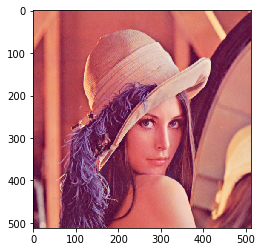

In [2]:
im = cv2.imread('lena.jpg')
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#img  = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blank_image = np.zeros(img.shape, dtype=np.uint8)
# plt.imshow(img,cmap = 'gray')
#plt.imshow(blank_image)


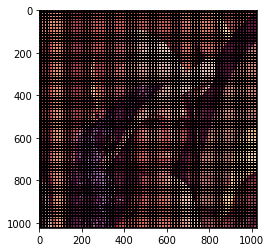

In [3]:
blank_image = np.zeros([img.shape[0]*2,img.shape[1]*2,3], dtype=np.uint8)
# plt.imshow(blank_image)
#print((blank_image.shape))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        blank_image[i*2][j*2] = img[i][j]
plt.imshow(blank_image)
# bl = blank_image
# plt.imshow(blank_image,cmap='gray')
# #print(blank_image[0])

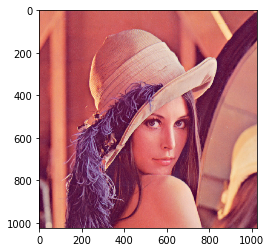

In [4]:
def bilinear(i,j,img,colorCode):
    if(i%2==0 and j%2!=0):
        a=int(img[i][j-1][colorCode])
        b=int(img[i][j+1][colorCode])
        value = (a+b)/2
    elif(i%2!=0 and j%2==0):
        a=int(img[i-1][j][colorCode])
        b=int(img[i+1][j][colorCode])
        value = (a+b)/2
    else:
        a=int(img[i-1][j-1][colorCode])
        b=int(img[i-1][j+1][colorCode])
        c=int(img[i+1][j-1][colorCode])
        d=int(img[i+1][j+1][colorCode])
        value=(a+b+c+d)/4
    return int(value)


for i in range(blank_image.shape[0]-1):
    for j in range(blank_image.shape[1]-1):
        if(i%2!=0 or j%2!=0):
            blank_image[i][j]=(bilinear(i,j,blank_image,0),bilinear(i,j,blank_image,1),bilinear(i,j,blank_image,2))
plt.imshow(blank_image)